In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import and Load dataset
df = pd.read_csv('lagos_house_prices.csv')

In [4]:
df.head(10)

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
0,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
1,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
2,yaba,1,1,2,650000.0,Mini flat,0,0,0,0,0,0,0,0,0
3,yaba,1,1,1,450000.0,Mini flat,0,0,0,0,0,0,0,0,0
4,yaba,3,3,4,800000.0,Detached duplex,0,1,0,0,0,0,0,0,0
5,yaba,1,1,2,600000.0,Mini flat,0,1,0,0,0,0,0,0,0
6,yaba,1,1,1,400000.0,Mini flat,1,0,0,0,0,0,0,0,0
7,yaba,1,2,2,550000.0,Mini flat,0,0,0,0,0,0,0,0,0
8,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0
9,yaba,1,1,2,700000.0,Mini flat,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        5336 non-null   object 
 1   bed             5336 non-null   int64  
 2   bath            5336 non-null   int64  
 3   toilet          5336 non-null   int64  
 4   price           5336 non-null   float64
 5   Property_Type   5336 non-null   object 
 6   Parking_Space   5336 non-null   int64  
 7   Security        5336 non-null   int64  
 8   Electricity     5336 non-null   int64  
 9   Furnished       5336 non-null   int64  
 10  Security_Doors  5336 non-null   int64  
 11  CCTV            5336 non-null   int64  
 12  Pool            5336 non-null   int64  
 13  Gym             5336 non-null   int64  
 14  BQ              5336 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 625.4+ KB


In [8]:
df.shape

(5336, 15)

In [9]:
# Check for missing values
df.isnull().sum()

location          0
bed               0
bath              0
toilet            0
price             0
Property_Type     0
Parking_Space     0
Security          0
Electricity       0
Furnished         0
Security_Doors    0
CCTV              0
Pool              0
Gym               0
BQ                0
dtype: int64

In [10]:
# Check Columns
df.columns

Index(['location', 'bed', 'bath', 'toilet', 'price', 'Property_Type',
       'Parking_Space', 'Security', 'Electricity', 'Furnished',
       'Security_Doors', 'CCTV', 'Pool', 'Gym', 'BQ'],
      dtype='object')

In [12]:
# Check datatype
df.dtypes

location           object
bed                 int64
bath                int64
toilet              int64
price             float64
Property_Type      object
Parking_Space       int64
Security            int64
Electricity         int64
Furnished           int64
Security_Doors      int64
CCTV                int64
Pool                int64
Gym                 int64
BQ                  int64
dtype: object

In [14]:
# Check the columns that is categorical and numerical
numerical_cols = df.select_dtypes(include=['int64','float']).columns.tolist()
numerical_cols

['bed',
 'bath',
 'toilet',
 'price',
 'Parking_Space',
 'Security',
 'Electricity',
 'Furnished',
 'Security_Doors',
 'CCTV',
 'Pool',
 'Gym',
 'BQ']

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['location', 'Property_Type']

In [19]:
# calculate summary satistics for all numerical column
df.describe().astype('int')

,bed,bath,toilet,price,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
count,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336,5336
mean,1,1,1,645566,0,0,0,0,0,0,0,0,0
std,0,0,0,469305,0,0,0,0,0,0,0,0,0
min,1,1,1,150,0,0,0,0,0,0,0,0,0
25%,1,1,1,350000,0,0,0,0,0,0,0,0,0
50%,1,1,1,500000,0,0,0,0,0,0,0,0,0
75%,1,2,2,800000,0,0,0,0,0,0,0,0,0
max,5,5,5,2450000,1,1,1,1,1,1,1,1,1


**From the statistical summary, we can make the following observations:**

- 1 bed, bath, toilet: Most properties have 1 bedroom, 1 bathroom, and 1 toilet. Some properties have up to 5 bedrooms, bathrooms, and toilets.
- price: The minimum price is extremely low at 150, which seems unrealistic for a property. We might need to further investigate this. The maximum price is 2,450,000.
Parking_Space, Security, Electricity, Furnished, Security_Doors, CCTV, Pool, Gym, BQ: These are binary columns, with values 0 (not available) or 1 (available). The means for these columns are close to 0, indicating that most properties do not have these features.  The highest mean among these features is for Security, suggesting that it's the most common feature among properties in this dataset.


# **Observations**

**The properties with extremely low prices seem to have the following attributes:**

- Most of them are of the type "Self contain" or "Mini flat", which are generally smaller property types. However, there's one "Detached duplex" listed with a price of 4000, which is highly unusual.
- None of the properties have features like Parking Space, Security, Electricity, etc., with the exception of one that's furnished.
The locations vary, with some being in places like "Lekki phase 1" and "Ikeja", which are typically higher-priced areas in Lagos.
Given these observations, it's possible that the prices for these properties are listed in thousands and are missing some zeros (e.g., 580 might actually mean 580,000). This seems especially plausible for locations like "Lekki phase 1".


# **Univariate Analysis**

In [20]:
# How many listiing are there per location
count_list= df['location'].value_counts().sort_values(ascending = False)
print(count_list)

yaba             1460
ajah              900
surulere          728
gbagada           692
ikorodu           578
lekki phase 1     521
ikeja             457
Name: location, dtype: int64


In [21]:
df['location'].unique()

array(['yaba', 'surulere', 'gbagada', 'lekki phase 1', 'ikorodu', 'ikeja',
       'ajah'], dtype=object)

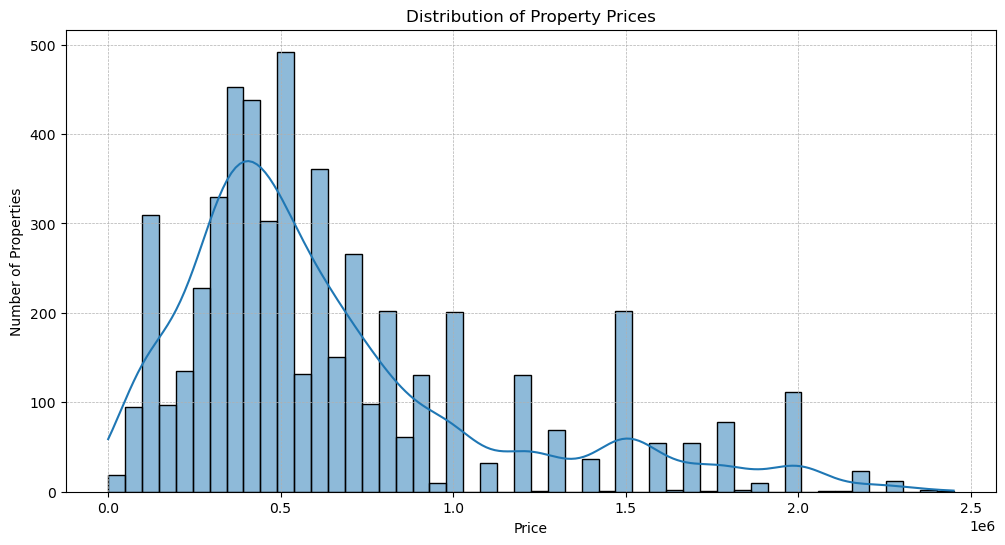

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

- The histogram depicts the distribution of property prices in Lagos. Most properties are priced between 150,000 and 1,000,000, with a peak around 500,000. There are fewer properties in the higher price range (above 1,000,000).
- Most values are clustered around the left tail of the distribution while the right tail is longer which means the average is greater than the median and modde.

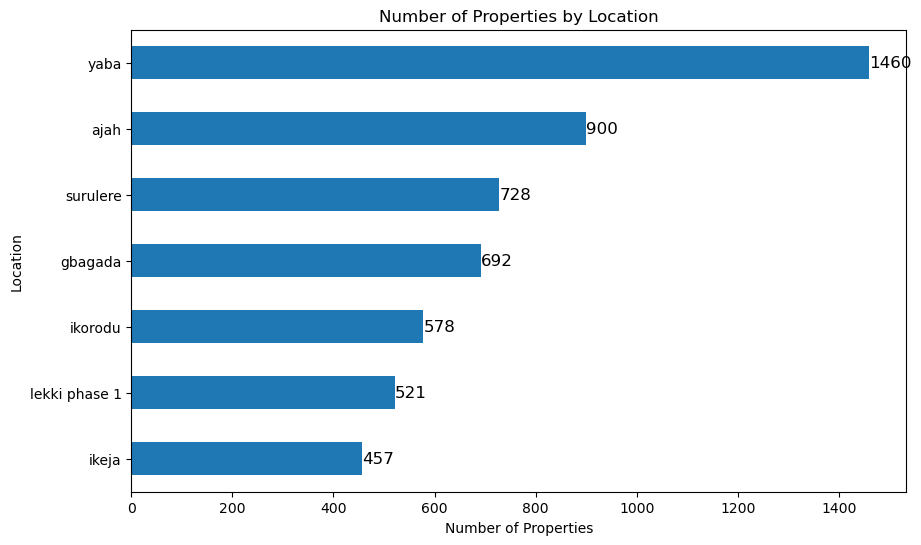

In [39]:
# Assuming you have already calculated the count_list as mentioned in your code
count_list = df['location'].value_counts().sort_values(ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = count_list.plot(kind='barh')
plt.xlabel('Number of Properties')
plt.ylabel('Location')
plt.title('Number of Properties by Location')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top

# Add data labels to the bars
for i, count in enumerate(count_list):
    ax.text(count, i, str(count), va='center', fontsize=12, color='black')

plt.show()

**The visualization provides insights into the number of properties listed by location:**
- Yaba seems to have the highest number of listed properties, followed by locations like Gbagada, Surulere, and Ikeja.
There are other locations with fewer listings, such as Lekki Phase 1, Victoria Island (VI), and Ikoyi.

These differences in listing counts could be due to factors like the popularity of the area, availability of properties, or the affordability of properties in those regions.

In [23]:
# count of property types across Lagos

count_pty = df['Property_Type'].value_counts().sort_values(ascending = False)
print(count_pty)

Mini flat                 3070
Self contain              1345
Flat / apartment           686
Semi detached duplex        66
Detached duplex             53
Blocks of flats             42
Terraced duplex             38
Detached bungalow           18
Penthouse flat              14
Semi detached bungalow       3
Massionette house            1
Name: Property_Type, dtype: int64


# **Bivariate Analysis**

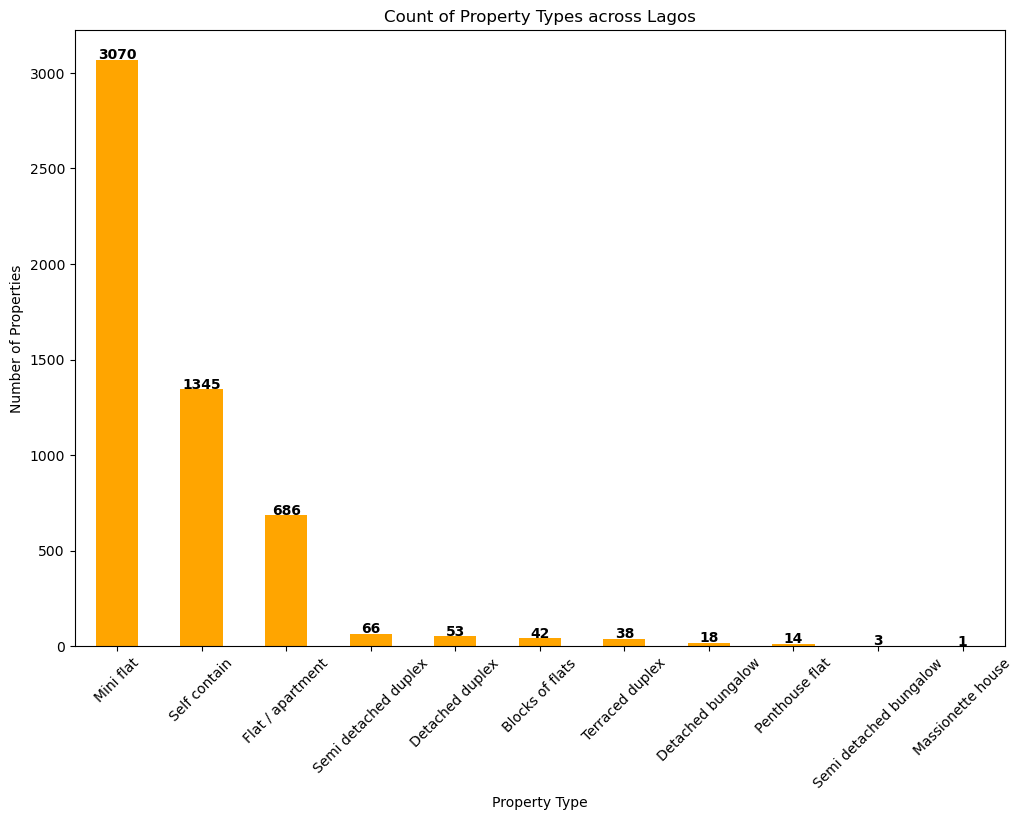

In [41]:
# Generate the column bar chart
ax = count_pty.plot.bar(figsize=(12, 8), color='orange')

# Set the title and axis labels
plt.title('Count of Property Types across Lagos')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')

# Add data labels
for i, v in enumerate(count_pty):
    ax.text(i, v + 3, str(v), ha='center', color='black', fontweight='bold')

# Set xtick labels and rotation
ax.set_xticklabels(count_pty.index, rotation=45)

# Show the plot
plt.show()

**The visualization provides insights into the distribution of property types:**

- Self contain and Mini flat are the most common property types listed, which aligns with the earlier observation that most properties have 1 bedroom, bathroom, and toilet.
- Other property types like Terraced duplex, Detached duplex, and Semi-detached duplex have fewer listings compared to the aforementioned categories.

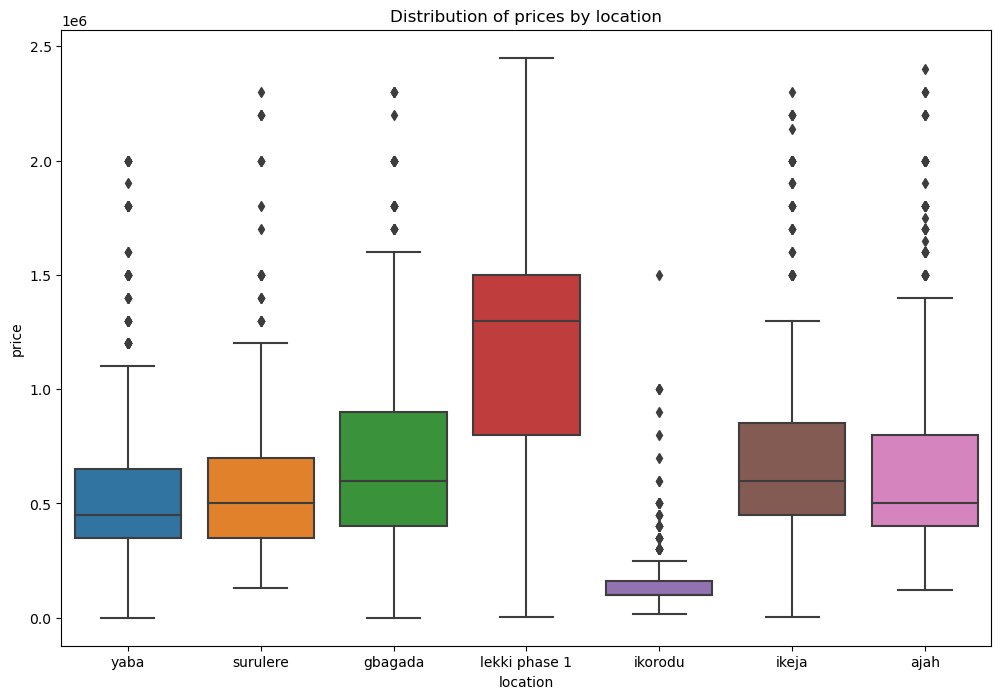

In [25]:
# view distribution of prices by location
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'location', y = 'price', data = df)
plt.title('Distribution of prices by location')
plt.show()

 **The visualization depicts the distribution of prices across various locations using box plots. Here are some insights based on the chart:**

1. Wide Range in Lekki Phase 1: Lekki Phase 1 shows a broad range of prices with a notably higher median price compared to other locations. The upper whisker and outliers suggest that there are some significantly high-priced properties in this area.

2. Consistency in Yaba: Yaba's price distribution appears relatively consistent, with a smaller interquartile range (the height of the blue box) and fewer outliers. This might indicate a more uniform property market in Yaba.

3. Higher Prices in Gbagada: Gbagada's median price (the line inside the green box) is relatively high and comparable to Lekki Phase 1, but with fewer extreme outliers.

4. Variability in Ikorodu: Ikorodu has a low median price but a broad range of prices, as indicated by the box's height and the presence of several outliers. This suggests a diverse property market in this location.

5. Concentration in Ikeja: The prices in Ikeja are concentrated in a relatively narrow range, with fewer outliers, which might suggest a more stable or mature market.

6. Surulere's Moderate Range: Surulere exhibits a moderate price range, with its interquartile range sitting between those of Yaba and Gbagada.

7. Ajah's Diverse Pricing: Ajah has an expansive range, with the box plot showcasing a significant distance between the lower and upper whiskers, and several outliers on the higher end. This suggests that while there are many moderately-priced properties, there are also several high-end properties in the area.

8. Outliers: Several locations, such as Lekki Phase 1, Ikorodu, and Ajah, show multiple outliers above the box. These outliers represent properties priced much higher than the typical range for those locations and might indicate luxury or premium listings.

- In summary, this visualization provides a comprehensive view of property prices across different locations. Each location has its unique pricing characteristics, reflecting the diversity of property markets in the represented areas. Stakeholders can use this information for investment decisions, market analysis, or understanding regional property value dynamics.


In [26]:
# Which location has more security facilities, such as CCTV cameras?
cctv_loc = df.groupby('location')['CCTV'].sum().sort_values()
print(cctv_loc)

location
lekki phase 1     0
gbagada           1
ajah              3
ikeja             5
yaba              5
ikorodu           8
surulere         12
Name: CCTV, dtype: int64


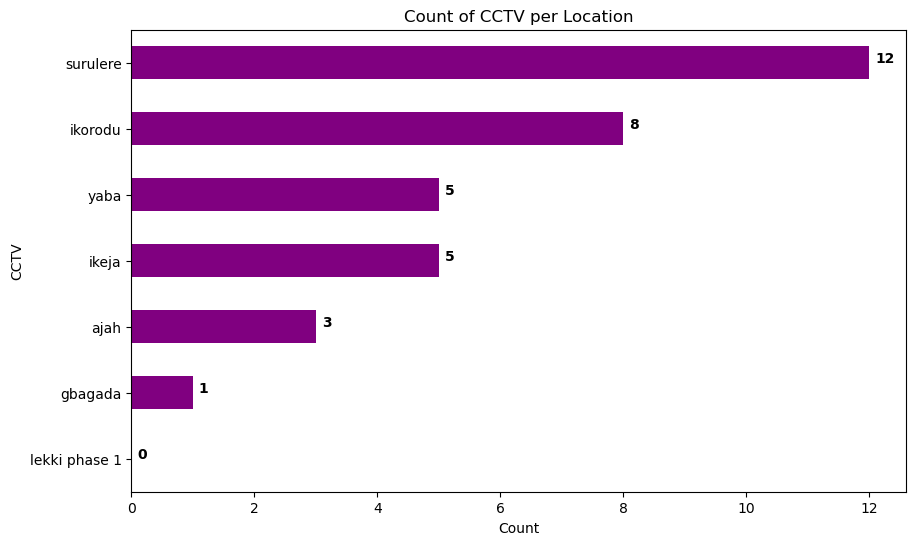

In [27]:
# Generate the horizontal bar chart
ax = cctv_loc.plot.barh(figsize=(10, 6), color='purple')

# Set the title and axis labels
plt.title('Count of CCTV per Location')
plt.ylabel('CCTV')
plt.xlabel('Count')

# Add data labels
for i, v in enumerate(cctv_loc):
    ax.text(v + 0.1, i, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

**Here are some insights from the given visualization:**

1. Surulere Leads in CCTV Count: Surulere has the highest number of CCTVs with a total count of 12. This could indicate it's a high-priority area for surveillance, potentially due to higher foot traffic, commercial importance, or security concerns.

2. Ikorodu Follows Closely: Ikorodu has the second-highest number of CCTVs at 8. This could be an indicator of its growing importance or possibly rising security measures.

3. Middle Ground Locations: Yaba and Ikeja both have 5 CCTVs each, placing them in the mid-tier category in terms of surveillance infrastructure.

4. Areas with Lower CCTV Count: Ajah, Gbagada, and Lekki Phase 1 have relatively fewer CCTVs. Specifically, Gbagada has just one CCTV, and Lekki Phase 1 has none, suggesting these areas might be perceived as lower risk or perhaps other forms of security measures are in place.

4. Potential for More Surveillance: Lekki Phase 1 having no CCTVs might indicate a potential area of expansion for security infrastructure, especially if it's a growing or significant region.

5. Diverse Security Needs: The variance in CCTV counts across different locations might reflect diverse security needs, priorities, and budgets for each area.

- In summary, this visualization offers insights into the distribution of surveillance infrastructure across different areas. It can help stakeholders identify areas of high surveillance, potential gaps, and plan for future security enhancements.

In [28]:
# What type of houses are the cheapest for the highest number of rooms for those seeking affordable housing?
min_loc = df.groupby('Property_Type')['price'].min().sort_values()
print(min_loc)

Property_Type
Self contain                  150.0
Mini flat                    3000.0
Detached duplex              4000.0
Flat / apartment            45000.0
Semi detached duplex        60000.0
Detached bungalow          400000.0
Blocks of flats            500000.0
Semi detached bungalow     600000.0
Penthouse flat             700000.0
Terraced duplex            750000.0
Massionette house         2200000.0
Name: price, dtype: float64


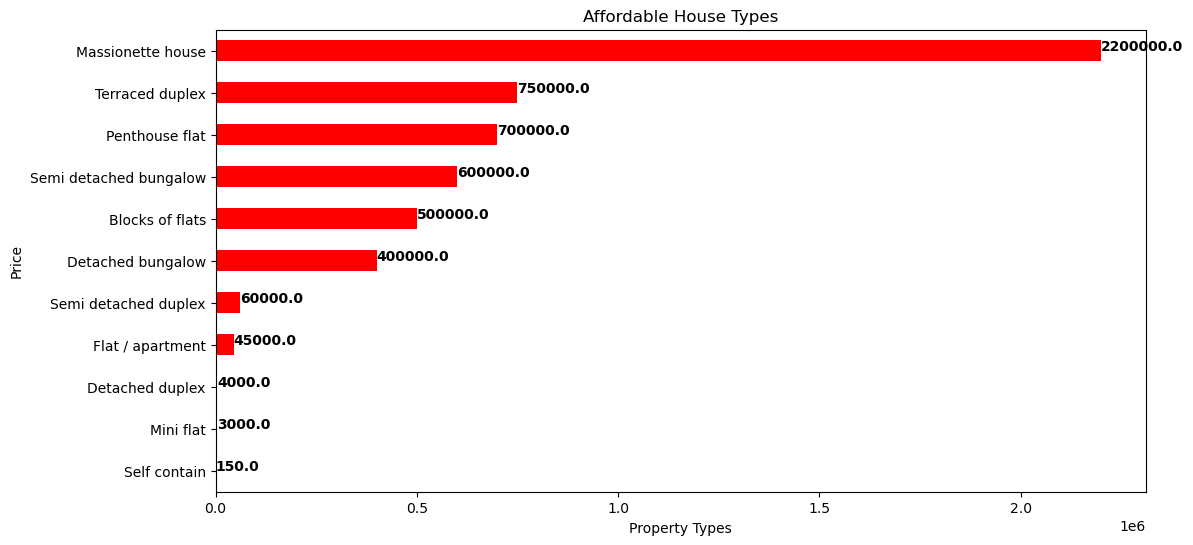

In [29]:
# Generate the horizontal bar chart
ax = min_loc.plot.barh(figsize=(12, 6), color='red')

# Set the title and axis labels
plt.title('Affordable House Types')
plt.ylabel('Price')
plt.xlabel('Property Types')

# Add data labels
for i, v in enumerate(min_loc):
    ax.text(v + 0.2, i, str(v), color='black', fontweight='bold')

# Show the plot
plt.show()

**Here are the insights derived from the given visualization:**

1. **Property Price Spectrum**: The chart provides a clear spectrum of housing affordability, ranging from the most expensive, "Maisonette house", to the least expensive, "Self contain".

2. **Top 3 Most Expensive**: The "Maisonette house", "Terraced duplex", and "Penthouse flat" are the top three most expensive property types, with the Maisonette house crossing the 2 million price point.

3. **Middle-Priced Properties**: "Semi detached bungalow", "Blocks of flats", "Detached bungalow", and "Semi detached duplex" fall in the mid-price range, hovering between 400,000 and 600,000.

4. **More Affordable Options**: "Flat / apartment", "Detached duplex", and "Mini flat" are more affordable housing types, priced under 50,000, with "Mini flat" and "Detached duplex" being significantly lower than "Flat / apartment".

5. **Least Expensive**: The "Self contain" property is the most affordable, priced at just 150, making it a potential choice for those on a tight budget.

6. **Significant Price Gaps**: There are notable price gaps between certain property types. For example, there's a substantial jump in price between "Mini flat" and "Detached duplex", as well as between "Penthouse flat" and "Semi detached bungalow".



In [30]:
# To know the location with the cheapest self contain
self_loc = df.pivot_table(values='price', aggfunc=['min'], index=['location', 'Property_Type']).unstack('Property_Type')
self_loc

min                                    \
                        price                                     
Property_Type Blocks of flats Detached bungalow Detached duplex   
location                                                          
ajah                 650000.0          600000.0        500000.0   
gbagada              650000.0         1000000.0        900000.0   
ikeja               1000000.0         1500000.0          4000.0   
ikorodu                   NaN          450000.0             NaN   
lekki phase 1             NaN          400000.0        250000.0   
surulere             500000.0         1500000.0       1000000.0   
yaba                 600000.0               NaN        800000.0   

                                                                           \
                                                                            
Property_Type Flat / apartment Massionette house Mini flat Penthouse flat   
location                                                                    
ajah                  180000.0               NaN  200000.0       700000.0   
gbagada                45000.0               NaN  150000.0       800000.0   
ikeja                 300000.0               NaN  200000.0            NaN   
ikorodu               120000.0               NaN   16000.0            NaN   
lekki phase 1         600000.0         2200000.0    3000.0      1600000.0   
surulere              350000.0               NaN  150000.0       850000.0   
yaba                  300000.0               NaN   35000.0       800000.0   

                                                                        \
                                                                         
Property_Type Self contain Semi detached bungalow Semi detached duplex   
location                                                                 
ajah              120000.0               600000.0             900000.0   
gbagada              150.0                    NaN            1200000.0   
ikeja             180000.0                    NaN              60000.0   
ikorodu            36000.0                    NaN            1000000.0   
lekki phase 1      10000.0                    NaN            1500000.0   
surulere          130000.0                    NaN            2000000.0   
yaba                 250.0                    NaN            2000000.0   

                               
                               
Property_Type Terraced duplex  
location                       
ajah                 750000.0  
gbagada             1500000.0  
ikeja               1800000.0  
ikorodu                   NaN  
lekki phase 1       1600000.0  
surulere                  NaN  
yaba                      NaN

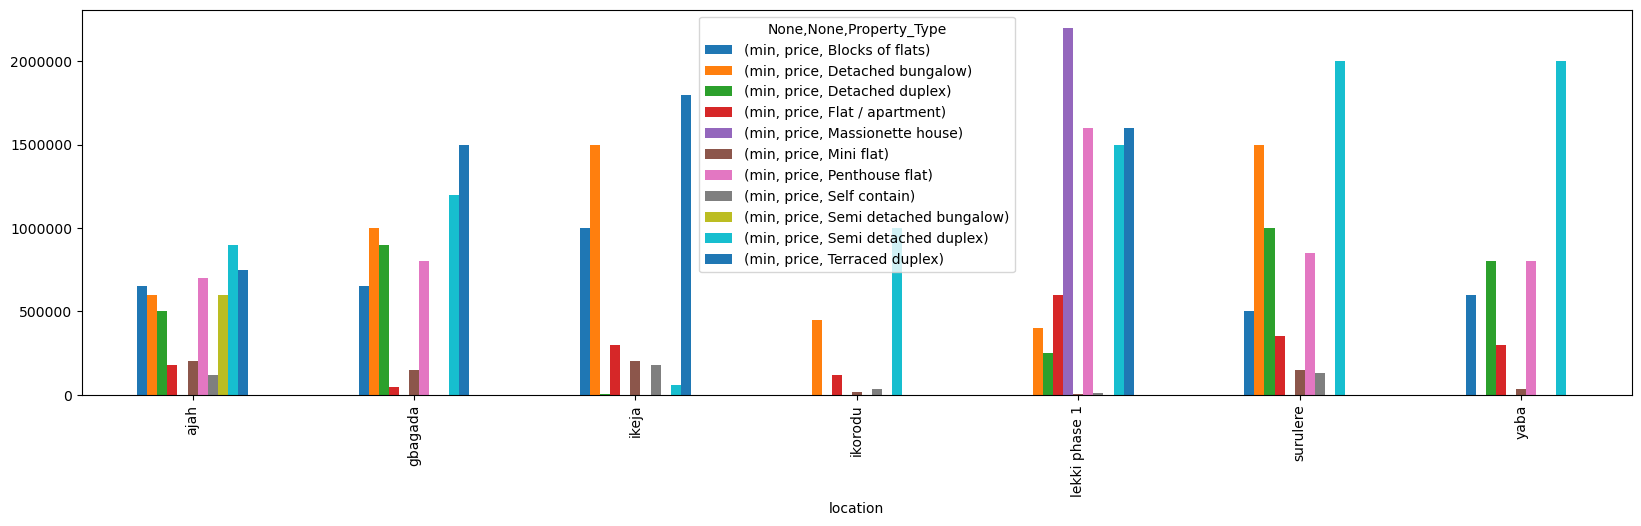

In [31]:
# plot a pivot table
self_loc.plot.bar(figsize = (20, 5))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

**Here are the insights drawn from the chart:**

- Diverse Property Types: The chart represents a variety of property types including Blocks of Flats, Detached Bungalows, Detached Duplexes, Flats/Apartments, Maisonette Houses, Mini Flats, Penthouse Flats, Self Contains, Semi Detached Bungalows, Semi Detached Duplexes, and Terraced Duplexes.

- Highest Minimum Prices: Yaba and Lekki Phase 1 generally have the highest minimum prices for most property types. In Yaba, the minimum prices for Detached Duplexes and Blocks of Flats are particularly high. Similarly, in Lekki Phase 1, the Detached Bungalows and Maisonette Houses have notably high minimum prices.

- Lowest Minimum Prices: Ikorodu seems to have the lowest minimum prices across most property types when compared to other locations. This might suggest that Ikorodu offers more affordable housing options.

- Variability in Prices: Gbagada displays a wide range of minimum prices. While it has high prices for Blocks of Flats and Detached Duplexes, it offers relatively lower prices for other property types like Terraced Duplexes and Maisonette Houses.

- Limited Property Types: Ikeja appears to have a limited range of property types available based on the minimum prices provided. This might indicate either a lack of data for some property types in Ikeja or that these properties are not as commonly available in that location.

- Unique Offerings: Some locations have particular property types that stand out in terms of price. For instance, in Surulere, the Maisonette Houses have a distinctive price peak.

- Consistent Offerings: Ajah has a consistent range of prices across most property types, without extreme highs or lows. This might suggest a more uniform property market in that area.

In conclusion, the chart offers a comprehensive view of the property market across different locations. Yaba and Lekki Phase 1 stand out as premium locations in terms of minimum property prices, while Ikorodu offers more budget-friendly options. Other locations, like Gbagada and Surulere, have unique market characteristics, showing variability in prices across property types.






In [32]:
df.tail()

,location,bed,bath,toilet,price,Property_Type,Parking_Space,Security,Electricity,Furnished,Security_Doors,CCTV,Pool,Gym,BQ
5331,ajah,1,1,2,600000.0,Mini flat,1,0,0,0,0,0,0,0,0
5332,ajah,2,2,2,700000.0,Mini flat,1,0,0,0,0,0,0,0,0
5333,ajah,4,4,5,1700000.0,Semi detached duplex,1,0,0,0,0,0,0,0,0
5334,ajah,1,1,2,500000.0,Mini flat,0,0,0,0,0,0,0,0,0
5335,ajah,4,4,5,1800000.0,Semi detached duplex,1,1,0,1,0,0,0,0,0


In [34]:
# TOP 3 LOCATION BY PRICE
location_loc = df.groupby('location')['price'].sum().sort_values(ascending = False)[:3]
print(location_loc)

location
yaba             804440839.0
lekki phase 1    630938000.0
ajah             624002009.0
Name: price, dtype: float64


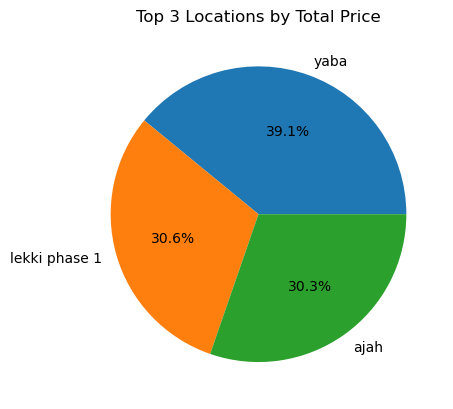

In [35]:
location_loc = df.groupby('location')['price'].sum().sort_values(ascending = False)[:3]

# Create a pie chart using matplotlib
plt.pie(location_loc.values, labels=location_loc.index, autopct='%1.1f%%')

# Add title
plt.title('Top 3 Locations by Total Price')

# Display the chart
plt.show()

**The visualization is a pie chart that displays the distribution of total prices across the top three locations: Yaba, Lekki Phase 1, and Ajah.**

From the chart, we can infer the following insights:

1. **Dominant Location by Price**: Yaba holds the largest share of the total price among the three locations, accounting for 39.1% of the total.

2. **Close Competition**: Lekki Phase 1 and Ajah are very closely priced. Lekki Phase 1 contributes to 30.6% of the total price, while Ajah makes up 30.3%. This suggests that the total property prices in these two areas are almost similar.

3. **Distribution**: The total prices are fairly evenly distributed across the three locations, with no single location overwhelmingly dominating the others in terms of total property prices.

4. **Potential Factors**: Given that Yaba leads in terms of total prices, it could be an indication of either a higher number of property sales, higher individual property prices, or both in comparison to Lekki Phase 1 and Ajah. However, without additional data, we cannot determine the exact cause.

In conclusion, while Yaba has a slight edge in terms of the total property price, Lekki Phase 1 and Ajah are closely competitive, and there isn't a significant disparity in total prices among the three top locations.

# **Multivariate Analysis**

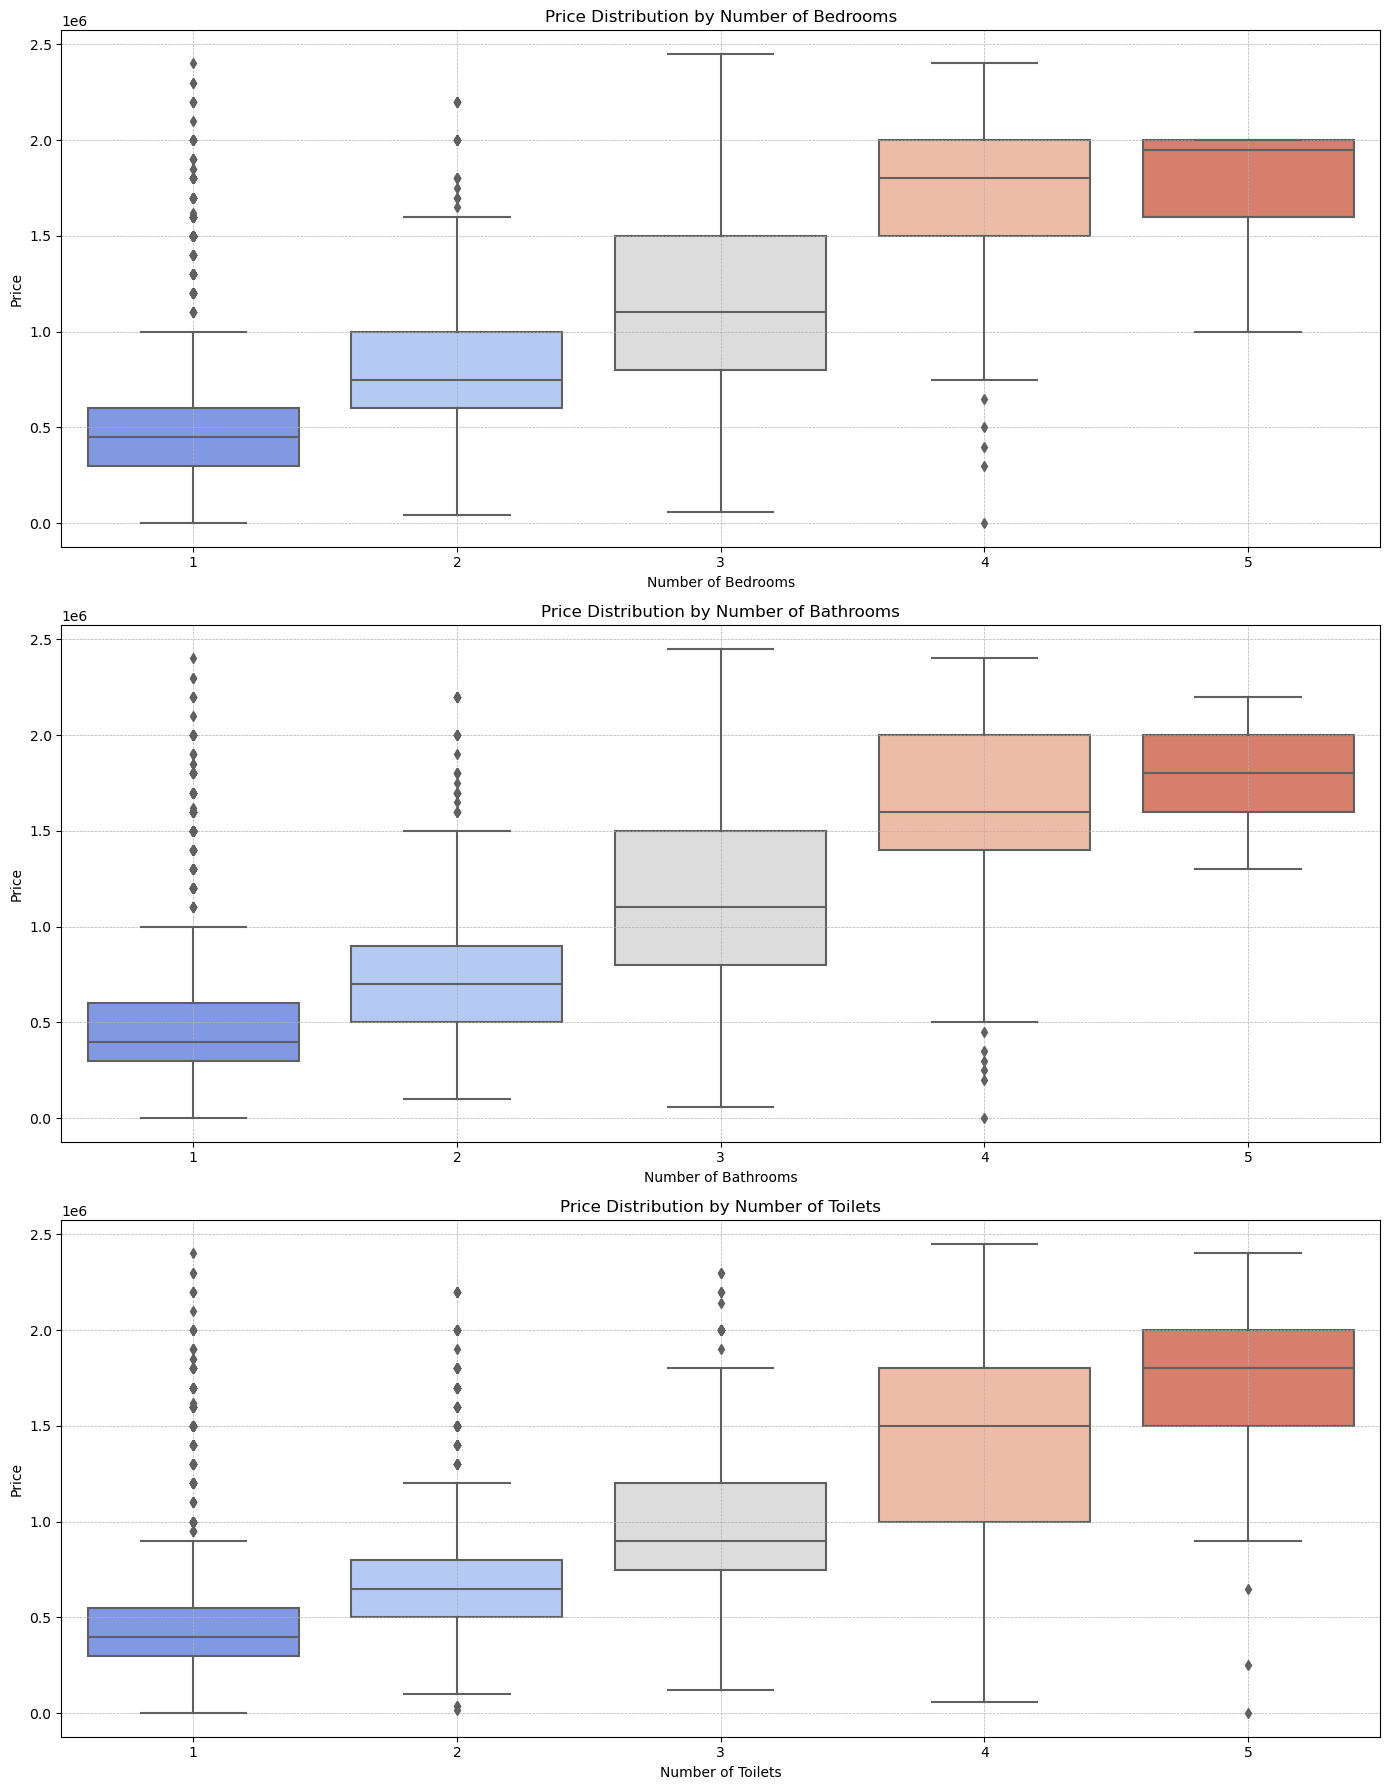

In [42]:
# Visualize the relationship between price and number of bedrooms, bathrooms, and toilets
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

sns.boxplot(x=df['bed'], y=df['price'], ax=axes[0], palette="coolwarm")
axes[0].set_title('Price Distribution by Number of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Price')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

sns.boxplot(x=df['bath'], y=df['price'], ax=axes[1], palette="coolwarm")
axes[1].set_title('Price Distribution by Number of Bathrooms')
axes[1].set_xlabel('Number of Bathrooms')
axes[1].set_ylabel('Price')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

sns.boxplot(x=df['toilet'], y=df['price'], ax=axes[2], palette="coolwarm")
axes[2].set_title('Price Distribution by Number of Toilets')
axes[2].set_xlabel('Number of Toilets')
axes[2].set_ylabel('Price')
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

**The boxplots reveal the following insights regarding the relationship between property price and the number of bedrooms, bathrooms, and toilets:**

- Number of Bedrooms: As the number of bedrooms increases, the median price of properties tends to rise. Properties with 4 or 5 bedrooms have higher price ranges compared to those with fewer bedrooms.
- Number of Bathrooms: A similar trend is observed with the number of bathrooms. Properties with more bathrooms generally have a higher median price.
- Number of Toilets: The pattern is consistent with toilets as well; more toilets in a property generally correspond to a higher price.

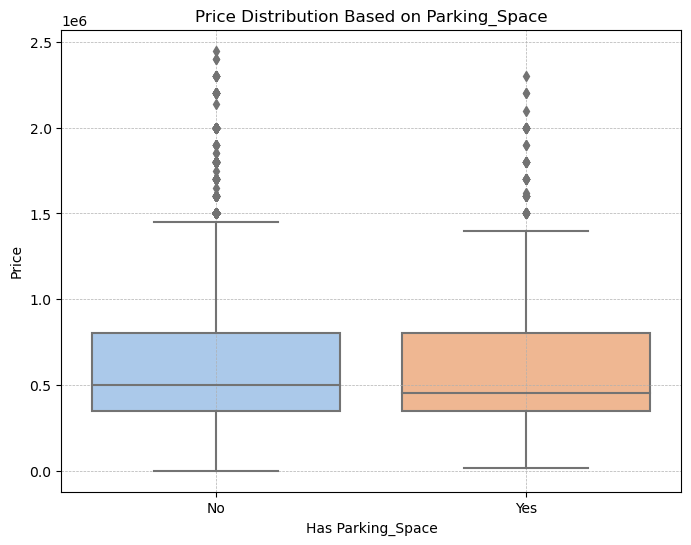

In [43]:
# Function to visualize median price based on the presence/absence of a feature
def plot_feature_vs_price(feature, data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature], y=data['price'], palette="pastel")
    plt.title(f'Price Distribution Based on {feature}')
    plt.xlabel(f'Has {feature}')
    plt.ylabel('Price')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

# Visualize median price based on the presence/absence of Parking Space
plot_feature_vs_price('Parking_Space', df)


**The provided visualization is a boxplot showing the price distribution based on whether a property has parking space or not.**

**From the visualization, we can draw the following insights:**

- Presence of Parking Space: Properties with parking spaces (represented by the 'Yes' category) generally have a higher median price compared to those without parking spaces (represented by the 'No' category).

- Spread of Prices:

Properties without parking space (the blue box) have a narrower interquartile range (IQR) compared to those with parking space. This means that the middle 50% of prices for properties without parking are more closely packed than those with parking.
Properties with parking space (the orange box) have a slightly wider IQR, suggesting a greater variability in prices within this category.
Outliers:

- Both categories have outliers, with some properties being priced significantly higher than the majority.
The properties without parking space seem to have more pronounced outliers, where the prices of some properties exceed the general price trend by a large margin.
Overall Price Range:

- While the median price for properties with parking is higher, the overall range (from the lowest to the highest price) for properties without parking space seems to be wider. This indicates that while most properties without parking might be cheaper, there are still some that are priced very high, possibly due to other premium features or locations.
In conclusion, while having a parking space generally increases the median property price, there are other factors that can significantly influence the price of a property even if it doesn't have a parking space.
